In [308]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize, NonlinearConstraint
from scipy.signal import hilbert
from sklearn import linear_model
from functools import partial
%matplotlib widget

# Playground

In [176]:
b_k = np.array([0.018986, 0.016354, 0.013055, 0.008849, 0.004248])/0.022
muy_k = np.array([4.257564, 7.456665, 17.910194, 17.366595, 5.579378])
phi_k = np.array([30.739, -157.801, 140.577, -55.885, 77.107])
p0 = 50.467718
muy_k = muy_k/180/3600*np.pi
phi_k = phi_k/180/3600*np.pi
p0 = p0/180/3600*np.pi
phi_p = np.pi/2
# b_k
phi_rand = np.random.rand(5)*np.pi

In [9]:
# b_k[None].shape

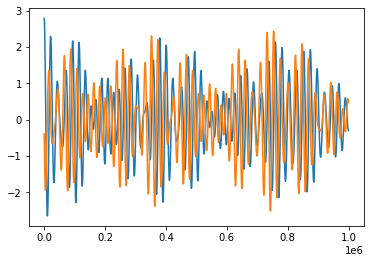

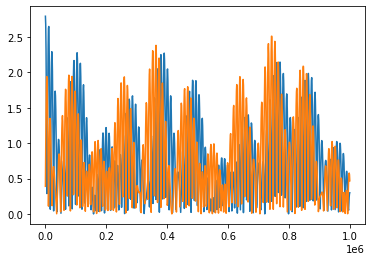

In [177]:
%matplotlib inline
times = np.linspace(0,1e6,1000)
z = np.sum(b_k[None]*np.cos(muy_k[None]*times[:,None] + phi_k[None]), axis=1)
zp = np.sum(b_k[None]*np.cos((muy_k[None]+p0)*times[:,None] + phi_k[None]), axis=1)
zp_2 = np.sum(b_k[None]*np.cos((muy_k[None]+p0)*times[:,None] + phi_k[None]+phi_p), axis=1)
phi_rand = np.random.rand(5)*np.pi
zp_rand = np.sum(b_k[None]*np.cos((muy_k[None]+p0)*times[:,None] + phi_rand[None]), axis=1)

# plt.plot(times, z)
plt.plot(times, zp)
# plt.plot(times, zp_2)
plt.plot(times, zp_rand)

plt.figure()
plt.plot(times, abs(zp))
# plt.plot(times, zp_2)
plt.plot(times, abs(zp_rand))

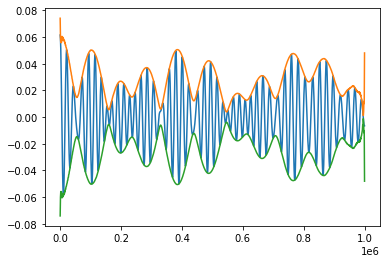

In [53]:
complex_z = hilbert(zp)
plt.plot(times, zp)
plt.plot(times, abs(complex_z))
plt.plot(times, -abs(complex_z))


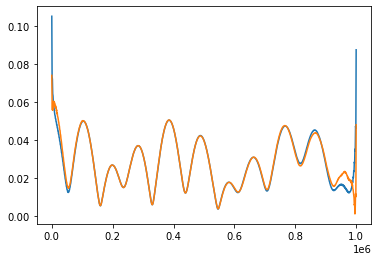

In [54]:
complex_zp = hilbert(zp)
complex_z = hilbert(z)
# plt.plot(times, zp)
plt.plot(times, abs(complex_z))
plt.plot(times, abs(complex_zp))

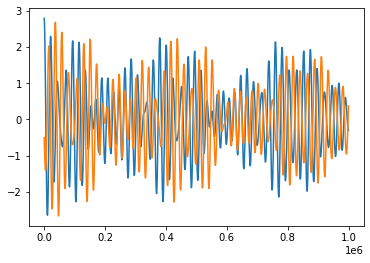

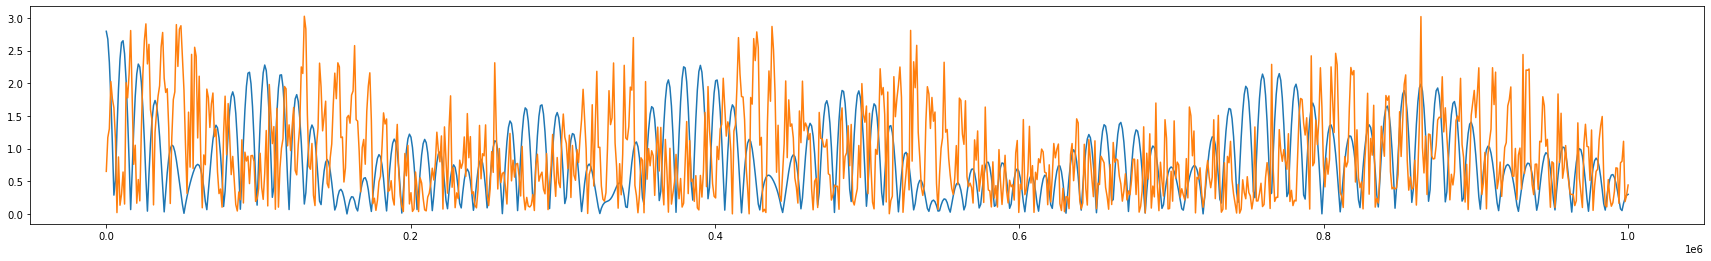

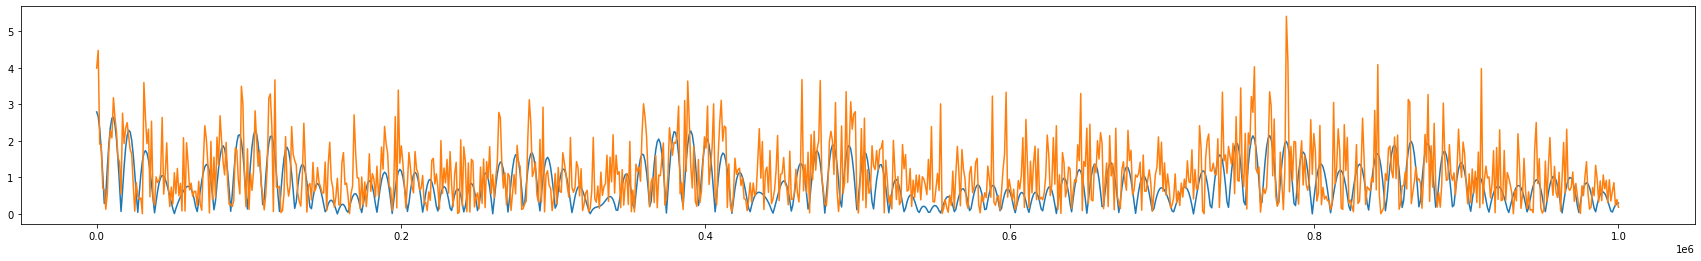

In [289]:
%matplotlib inline
n_t = 1000 
times = np.linspace(0,1e6,n_t)
z = np.sum(b_k[None]*np.cos(muy_k[None]*times[:,None] + phi_k[None]), axis=1)
zp = np.sum(b_k[None]*np.cos((muy_k[None]+p0)*times[:,None] + phi_k[None]), axis=1)
phi_rand = np.random.rand(5)*np.pi
zp_rand = np.sum(b_k[None]*np.cos((muy_k[None]+p0)*times[:,None] + phi_rand[None]), axis=1)
# zp = zp/zp.std()
# zp_rand = zp_rand/zp_rand.std()

# plt.plot(times, z)
plt.plot(times, zp)
# plt.plot(times, zp_2)
plt.plot(times, zp_rand)


plt.figure(figsize=(30,4))
plt.plot(times, abs(zp))
# plt.plot(times, zp_2)
noise = np.random.randn(n_t)/2
plt.plot(times, abs(zp_rand+noise))

plt.figure(figsize=(30,4))
plt.plot(times, abs(zp))
# plt.plot(times, zp_2)
noise = np.random.randn(n_t)
plt.plot(times, abs(zp+noise), '-')



# Problem

[0.07191442 0.73736582 3.73934628 4.77884498 3.40765223]


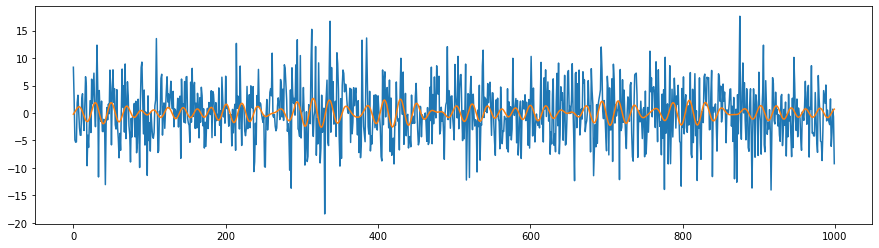

In [338]:
n_t = 1000 
times = np.linspace(0,1e6,n_t)
# z = np.sum(b_k[None]*np.sin(muy_k[None]*times[:,None] + phi_k[None]), axis=1)
# zp = np.sum(b_k[None]*np.sin((muy_k[None]+p0)*times[:,None] + phi_k[None]), axis=1)

phi_true = np.random.rand(5)*np.pi*2
print(phi_true)
zp = np.sum(b_k[None]*np.sin((muy_k[None]+p0)*times[:,None] + phi_true[None]), axis=1)


# zp = zp/zp.std()
# zp_rand = zp_rand/zp_rand.std()
# y = abs(zp)
noise = np.random.randn(n_t)*5
y = zp + noise
%matplotlib inline
plt.figure(figsize=(15,4))
plt.plot(y)
plt.plot(zp)

In [ ]:
def MSE(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)




def lin_model_gen(AB_k, times, b_k, muy_k):
    A_k, B_k = AB_k[:len(AB_k)//2], AB_k[len(AB_k)//2:]
    ts_cos = A_k[None]*b_k[None]*np.sin(muy_k[None]*times[:,None])
    ts_sin = B_k[None]*b_k[None]*np.cos(muy_k[None]*times[:,None])
    return np.sum(ts_cos+ts_sin, axis=1)



def loss_func(AB_k, times, b_k, muy_k, y_target):
    return MSE(y_target, lin_model_gen(AB_k, times, b_k, muy_k))


## only vary phase

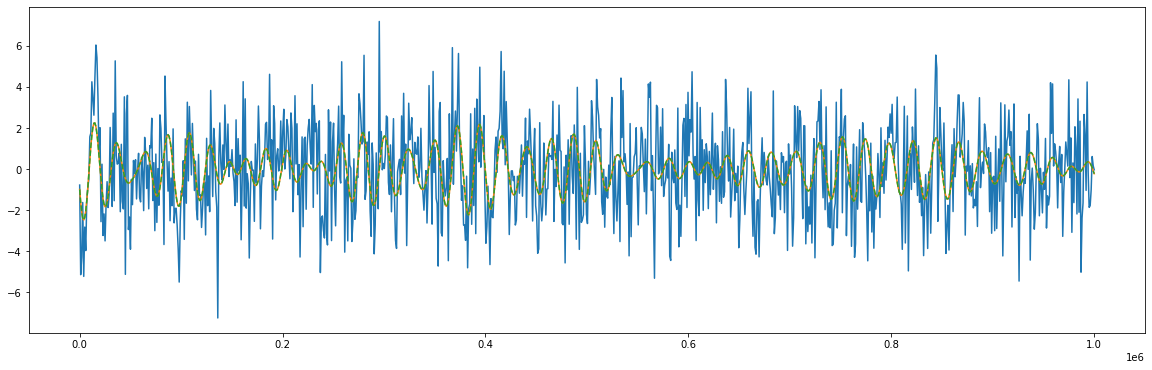

In [302]:

loss = partial(loss_func, times=times, b_k=b_k, muy_k=muy_k+p0, y_target=y)



ABtrue = np.hstack([np.cos(phi_true), np.sin(phi_true)])
y_true = lin_model_gen(ABtrue, times, b_k, muy_k+p0)


plt.figure(figsize=(20,6))
# plt.plot(y)
plt.plot(times, y)

plt.plot(times, y_true)
plt.plot(times, zp, "--")

In [284]:
res = minimize(loss, AB0, bounds=bounds, tol=1e-6)
AB_x = res.x
res

      fun: 0.9732053270483416
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.77819996e-04, -1.01307850e-04,  1.14352971e-05,  2.39674947e-04,
       -2.36699549e-04,  3.09907654e-04,  4.26869651e-04, -1.38611344e-04,
        6.72240038e-05,  1.05559783e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 132
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([-0.50799456, -0.91005442, -0.78132177, -0.03285905,  0.3474451 ,
        0.80827535,  0.35296597,  0.59603757,  0.84735041, -1.        ])

In [285]:
print(AB_x[:5]**2+AB_x[5:]**2)
AB_x, ABtrue

[0.91136751 0.95278402 0.9657245  0.71908243 1.1207181 ]


(array([-0.50799456, -0.91005442, -0.78132177, -0.03285905,  0.3474451 ,
         0.80827535,  0.35296597,  0.59603757,  0.84735041, -1.        ]),
 array([-0.57019231, -0.90052156, -0.82101797, -0.00658864,  0.35539645,
         0.82151125,  0.43481135,  0.57090235,  0.99997829, -0.93471566]))

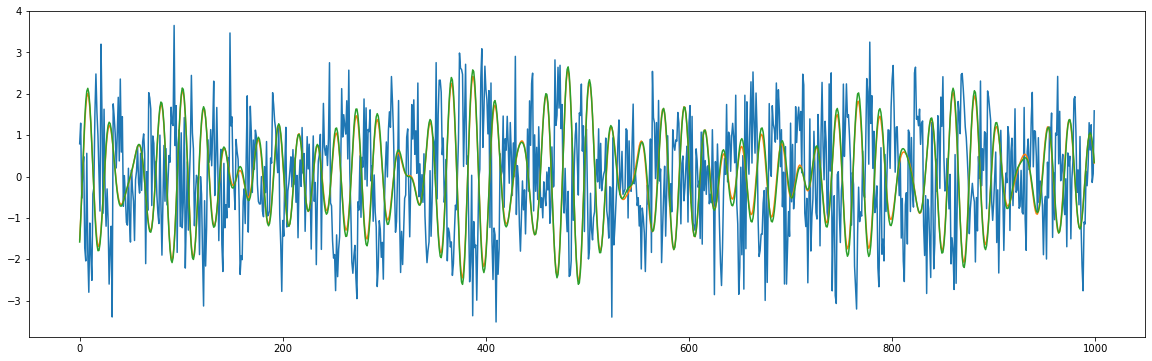

In [286]:
y_pred = lin_model_gen(AB_x, times, b_k, muy_k+p0)
y_true = lin_model_gen(ABtrue, times, b_k, muy_k+p0)


plt.figure(figsize=(20,6))
plt.plot(y)
plt.plot(y_pred)
plt.plot(y_true)

## Also vary phase + amplitude

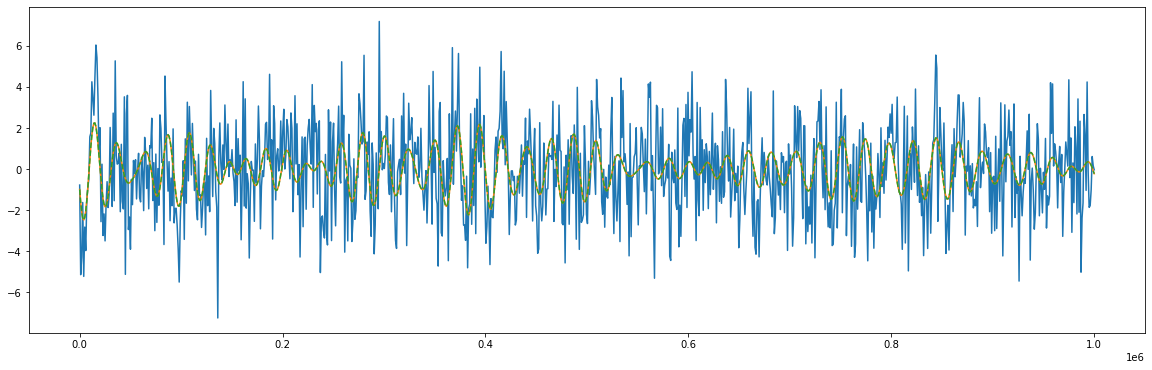

In [305]:

loss = partial(loss_func, times=times, b_k=np.ones_like(muy_k), muy_k=muy_k+p0, y_target=y)

ABtrue = np.hstack([b_k*np.cos(phi_true), b_k*np.sin(phi_true)])
y_true = lin_model_gen(ABtrue, times, np.ones_like(muy_k), muy_k+p0)


plt.figure(figsize=(20,6))
# plt.plot(y)
plt.plot(times, y)
plt.plot(times, y_true)
plt.plot(times, zp, "--")

### Opt1
Linear Regression with scipy minimize

In [303]:
n_term = len(muy_k)
phase0 = np.random.rand(n_term)*np.pi*2
AB0 = np.hstack([np.sin(phase0), np.cos(phase0)])
# bounds = [(-1,1) for _ in range(10)]
res = minimize(loss, AB0, bounds=None)
AB_x = res.x
res

      fun: 3.9233068306492376
 hess_inv: array([[ 1.22017511e+00,  1.41735389e-01,  1.49119558e-01,
        -9.88249819e-02,  4.30643286e-02,  4.84876655e-03,
         8.88935001e-02, -2.16723872e-02, -1.17715701e-01,
         4.48427691e-03],
       [ 1.41735389e-01,  1.33674341e+00, -1.69821024e-01,
         1.85564882e-01,  5.31511802e-01, -1.20225347e-01,
         3.81811770e-01,  9.71097349e-02,  2.75794257e-01,
        -5.15528326e-01],
       [ 1.49119558e-01, -1.69821024e-01,  4.84077463e+00,
        -1.75730152e+00,  4.51274664e-01,  1.32673082e-02,
        -8.05697024e-02,  2.01997042e-01, -5.27362437e+00,
         2.15181133e-01],
       [-9.88249819e-02,  1.85564882e-01, -1.75730152e+00,
         1.18458913e+01,  2.93272813e-01, -6.80006227e-02,
        -1.49170389e-01,  6.27560807e+00,  1.70671728e-01,
        -9.12137513e-01],
       [ 4.30643286e-02,  5.31511802e-01,  4.51274664e-01,
         2.93272813e-01,  1.38788010e+01, -2.67339160e-02,
         8.30222166e-01,  4.4

In [306]:
print(AB_x[:5]**2+AB_x[5:]**2, ABtrue[:5]**2+ABtrue[5:]**2, b_k**2)
AB_x, ABtrue

[1.16405078 0.91869869 1.68410292 0.93579816 2.92443112] [0.744769   0.5525895  0.35213435 0.16178678 0.0372841 ] [0.744769   0.5525895  0.35213435 0.16178678 0.0372841 ]


(array([-0.94555478, -0.68069886, -0.97823699, -0.58112764, -1.57481701,
        -0.51959306, -0.67479461, -0.85273403,  0.77336203,  0.66662022]),
 array([-0.78687642, -0.59519343, -0.40765582, -0.39468003, -0.11662298,
        -0.35439314, -0.44534736, -0.43122046,  0.0775529 ,  0.1538934 ]))

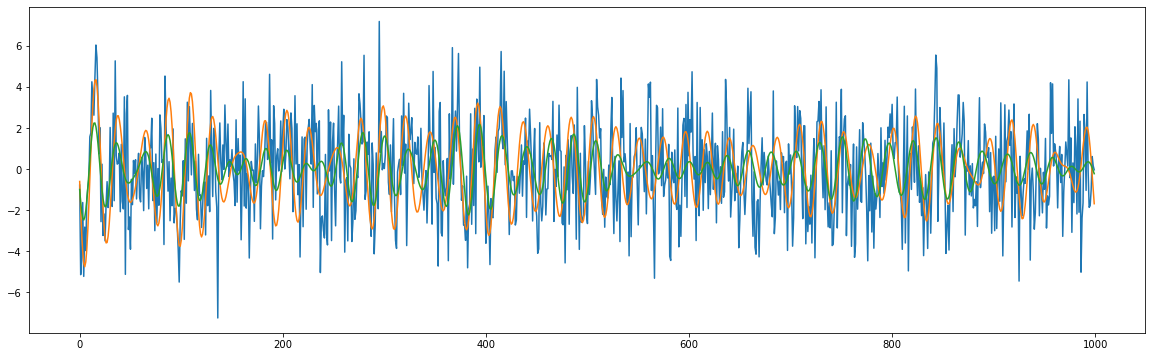

In [307]:
y_pred = lin_model_gen(AB_x, times, np.ones_like(muy_k), muy_k+p0)
y_true = lin_model_gen(ABtrue, times, np.ones_like(muy_k), muy_k+p0)


plt.figure(figsize=(20,6))
plt.plot(y)
plt.plot(y_pred)
plt.plot(y_true)

### Opt 2
Ordinary Linear Regression

In [347]:
def generate_X_linReg(b_k, muy_k, times):
    ts_cos = b_k[None]*np.sin(muy_k[None]*times[:,None])
    ts_sin = b_k[None]*np.cos(muy_k[None]*times[:,None])
    return np.concatenate([ts_cos, ts_sin], axis=1)
X = generate_X_linReg(b_k, muy_k+p0, times)
ABtrue = np.hstack([np.cos(phi_true), np.sin(phi_true)])


X = generate_X_linReg(np.ones_like(muy_k), muy_k+p0, times)
ABtrue = np.hstack([b_k*np.cos(phi_true), b_k*np.sin(phi_true)])



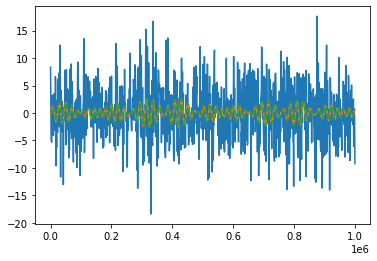

In [340]:
y2 = X @ ABtrue
plt.figure()
plt.plot(times, y)
plt.plot(times, y2)
plt.plot(times, zp, "--")


In [348]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(ABtrue)
print(AB_x[:5]**2+AB_x[5:]**2, ABtrue[:5]**2+ABtrue[5:]**2)


[ 0.83540694  0.79686097 -0.3382234  -0.73918662 -0.43433973  0.23366935
  0.4261428  -0.90995018 -0.36234604  0.14836005]
[ 0.86076938  0.55026912 -0.4905131   0.02671074 -0.1862969   0.06200866
  0.49979334 -0.33396294 -0.4013394  -0.05076972]
[1.16405078 0.91869869 1.68410292 0.93579816 2.92443112] [0.744769   0.5525895  0.35213435 0.16178678 0.0372841 ]


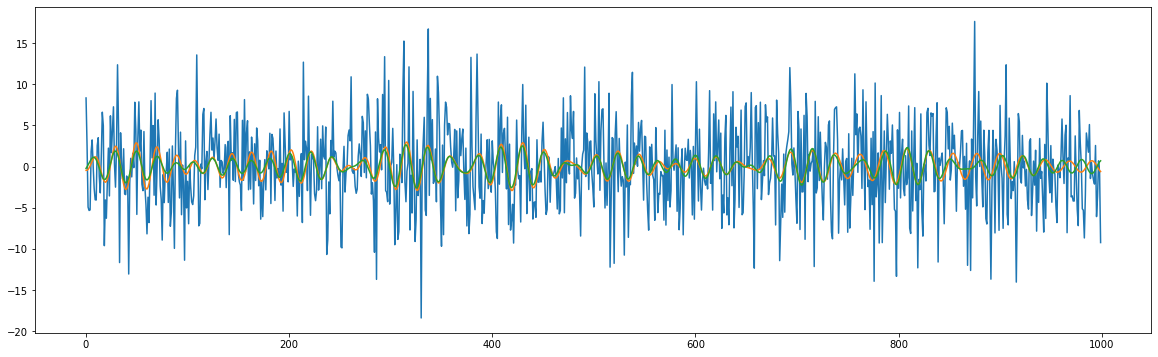

In [349]:
y_true = X @ ABtrue
y_pred = X @ reg.coef_


plt.figure(figsize=(20,6))
plt.plot(y)
plt.plot(y_pred)
plt.plot(y_true)